## Higgs Effective Field Theory: Parameters
Created: Feb 12, 2024 Nicola de Filippis, Kurtis Johnson, Harrison B. Prosper<br>

### Introduction 
The notebook plots distributions of the cross section per 15 GeV bin in the di-Higgs mass, $m_{gg}$, for a few hundred points in the parameter space of the
Higgs effective field theory (HEFT). The HEFT is defined by the 5D parameter space of Wilson coefficients[1],
\begin{align}
    \theta & = c_{hhh}, c_t, c_{tt}, c_{ggh}, c_{gghh}.
\end{align}

### References
  1. Lina Alasfar *et al.*, arXiv:2304.01968v1.

In [1]:
import os, sys

# the standard module for tabular data
import pandas as pd

# the standard module for array manipulation
import numpy as np

# the standard modules for high-quality plots
import matplotlib as mp
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# update fonts
FONTSIZE = 14
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : FONTSIZE}
mp.rc('font', **font)

# set usetex = False if LaTex is not 
# available on your system or if the 
# rendering is too slow
mp.rc('text', usetex=True)

### Load data

In [4]:
df = pd.read_csv('../data/powheg_gauss_param.csv')

df[:5]

,klambda,CT,CTT,CGHH,CGGHH
0,1.824486,3.617048,0.596670,-0.692940,-2.819527
1,0.305763,2.157825,-1.531478,0.493841,-1.881899
2,1.493947,-0.761028,3.452457,-4.359866,-0.808658
3,0.186852,5.340556,1.049610,-0.504611,-0.020435
4,1.109340,1.377494,1.615746,-0.346222,0.141523


In [6]:
columns = list(df.columns)
columns

['klambda', 'CT', 'CTT', 'CGHH', 'CGGHH']

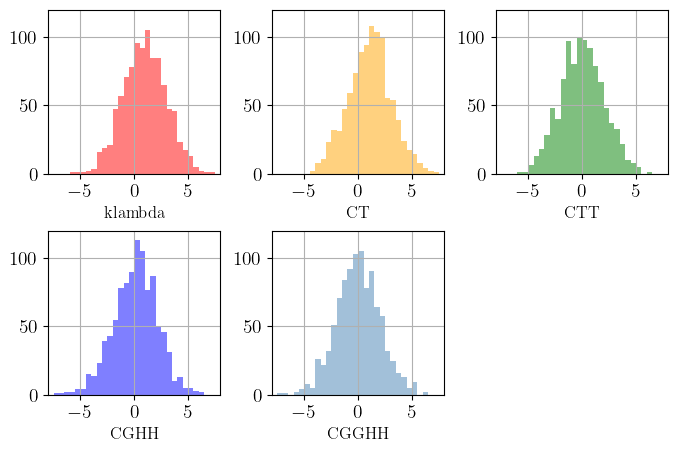

In [21]:
def plot_params(df, columns, 
                gfile='figures/fig_heft_params.png', 
                ftsize=12,
                fgsize=(8, 5)):
    
    # define equally spaced points for m_hh
    xbins= 32
    xmin =-8
    xmax = 8
   
    # make room for 6 sub-plots
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=fgsize)
    
    # adjust padding between plots
    plt.subplots_adjust(hspace=0.35)
    plt.subplots_adjust(wspace=0.30)
    
    # use flatten() to convert a numpy array of 
    # shape (nrows, ncols) to a 1-d array. 
    axes = axes.flatten()
   
    kolor = ['red', 'orange', 'green', 'blue', 
             'steelblue', 'indigo', 'black']
    
    ymin, ymax = 0, 120
    
    for i in range(len(columns)):

        xlabel = columns[i]
        
        ax = axes[i]
        ax.set_xlim(xmin, xmax)
        ax.set_xlabel(xlabel, fontsize=ftsize)
        ax.set_ylim(ymin, ymax)
        
        c = kolor[i % len(kolor)]
        ax.hist(df[xlabel], bins=xbins, range=(xmin, xmax), color=c, alpha=0.5)
        ax.grid()
        
    # hide unused sub-plots
    for k in range(len(columns), len(axes)):
        axes[k].set_visible(False)
    
    plt.savefig(gfile)
    plt.show()
    
plot_params(df, columns)